# Assignment 2

## General information

Please give short (2-3 sentences) interpretations / explanations to your answers, not only the program code and outputs. Be concise and focused (less could be more ;)).

Grades will be distributed with the following rule: from the points you earn, you get 100% if you submit until the due date (**2025-03-16 21:00 CET**), 50% within 24 hours past due date, and 0% after that.

## Train an approximately sparse model

In this assignment, you will work with a synthetic dataset that follows a standard linear model:

Let's work with a simple linear model:

$$
Y = X'\beta + \varepsilon = \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \varepsilon
$$

This model is _approximately sparse_, meaning that most of the coefficients are close to zero (their magnitudes decay quadratically with their index):

$$
\beta_j = \frac{1}{j^2}
$$

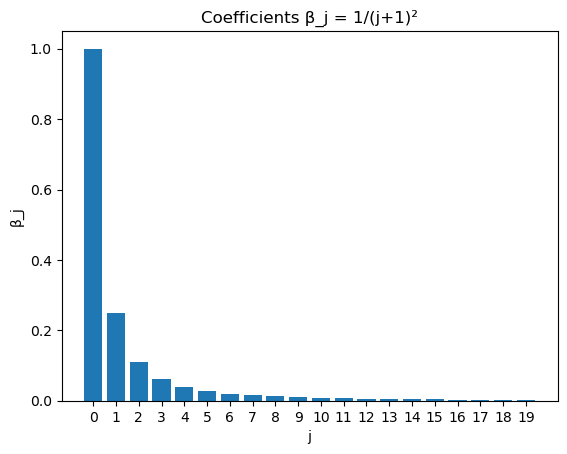

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prng = np.random.RandomState(20250310)

def generateBeta(n_features):
    return [1/(j + 1)**2 for j in range(n_features)]

def generateData(n_samples, n_features, prng):
    X = pd.DataFrame(prng.multivariate_normal(
        mean=np.repeat(0, n_features), 
        cov=np.eye(n_features), 
        size=n_samples
    ))
    beta = generateBeta(n_features)
    y = np.dot(X, beta) + prng.normal(0, 1, size=n_samples)
    return X, y

p = 20
plt.bar(range(p), generateBeta(p))
plt.xlabel('j')
plt.xticks(range(p))
plt.ylabel('β_j')
plt.title('Coefficients β_j = 1/(j+1)²')
plt.show()


## Tasks


1. Generate a single dataset with 20 features and 100 observations using the provided function: `generateData(100, 20, prng)`.

2. Implement Lasso regression with cross-validation to determine the optimal regularization parameter (alpha). Select an appropriate number of cross-validation folds and provide justification for your choice, considering both statistical validity and computational efficiency.

3. Create a plot displaying the Mean Squared Error (MSE) for each candidate regularization parameter, evaluated across all cross-validation folds. Include individual MSE values for each fold and the average MSE across folds for each parameter value, and highlight the optimal value of the regularization parameter. Briefly interpret your results.

4. Generate a coefficient path plot that illustrates how feature coefficients change as the regularization parameter varies. Briefly interpret your results.